## CALORIES BURNT PREDICTION USING MACHINE LEARNING
Calorie burnt prediction by machine learning algorithm aim to predict the number of calories burnt by an individual during physical activity using machine learning techniques. We collected a dataset that includes features such as heart rate, body temperature ,duration and various others. Here we used machine learning models like **Linear Regression** and **XGBoost** to predict calorie burn based on 15,000 records with 7 features.

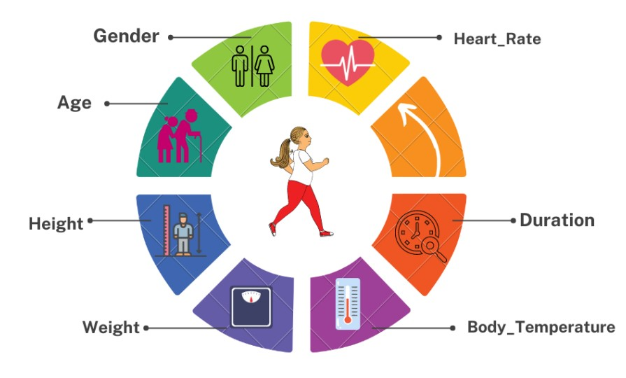

**Importing Necessary Libraries**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics

**Importing Datasets**

In [64]:
df1 = pd.read_csv("E:\\SYMBIOSIS MSC DSSA\\SEM 2\\Machine Learning\\Calorie_Burnt_Prediction_using_ML\\exercise.csv")
df1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [65]:
df2 = pd.read_csv("E:\\SYMBIOSIS MSC DSSA\\SEM 2\\Machine Learning\\Calorie_Burnt_Prediction_using_ML\\calories.csv")
df2.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


**Concatenating both the DataFrames (Merging two tables)**

In [66]:
df = pd.concat([df1,df2['Calories']],axis=1)
df.sample(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
13902,12863970,female,33,150.0,52.0,30.0,112.0,41.2,209.0
5357,11165288,female,24,162.0,61.0,23.0,98.0,40.9,119.0
10098,10259917,male,27,169.0,68.0,4.0,90.0,38.9,13.0
1449,14860278,male,34,196.0,101.0,8.0,88.0,39.5,31.0
4182,14859275,female,27,180.0,80.0,13.0,93.0,40.0,58.0
13222,11626079,female,53,156.0,57.0,8.0,91.0,39.7,40.0
9019,19665517,male,27,175.0,77.0,29.0,117.0,40.9,216.0
14344,18492182,female,52,142.0,42.0,7.0,88.0,39.4,34.0
6471,14242763,female,25,156.0,59.0,6.0,89.0,39.2,26.0
4592,12359689,female,24,154.0,57.0,2.0,79.0,38.1,6.0


In [67]:
df.shape

(15000, 9)

**Displaying Information about the Dataframe**

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


**Statistical Summary of the dataframe**

In [69]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


**Finding number of null values(if any)**

In [70]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

**So here we can observe that there are no null values or missing values in the dataset**

**Finding Duplicate values(if any)**

In [71]:
df.duplicated().sum()

0

**Removing the User_ID column since it does not impact our dataset and is not required for processing.**

In [72]:
df = df.drop(['User_ID'],axis=1)
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


**Extracting categorical and numerical column**

In [74]:
categorical_col = [i for i in df.columns if df[i].dtype == 'object']
categorical_col

['Gender']

In [75]:
numerical_col = [i for i in df.columns if df[i].dtype != 'object']
numerical_col

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

## Data Visualization

In [76]:
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

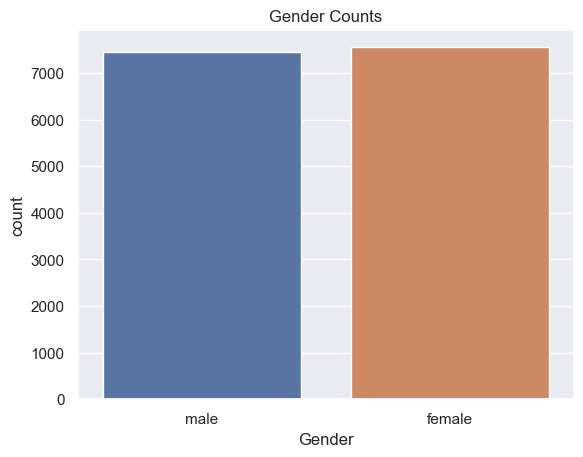

In [77]:
sns.set()
sns.countplot(x='Gender',data=df)
plt.title("Gender Counts")
plt.show()

**Creating a fataframe with only numerical columns**

In [78]:
Numerical_df = df[numerical_col]
Numerical_df.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,69,179.0,79.0,5.0,88.0,38.7,26.0
3,34,179.0,71.0,13.0,100.0,40.5,71.0
4,27,154.0,58.0,10.0,81.0,39.8,35.0


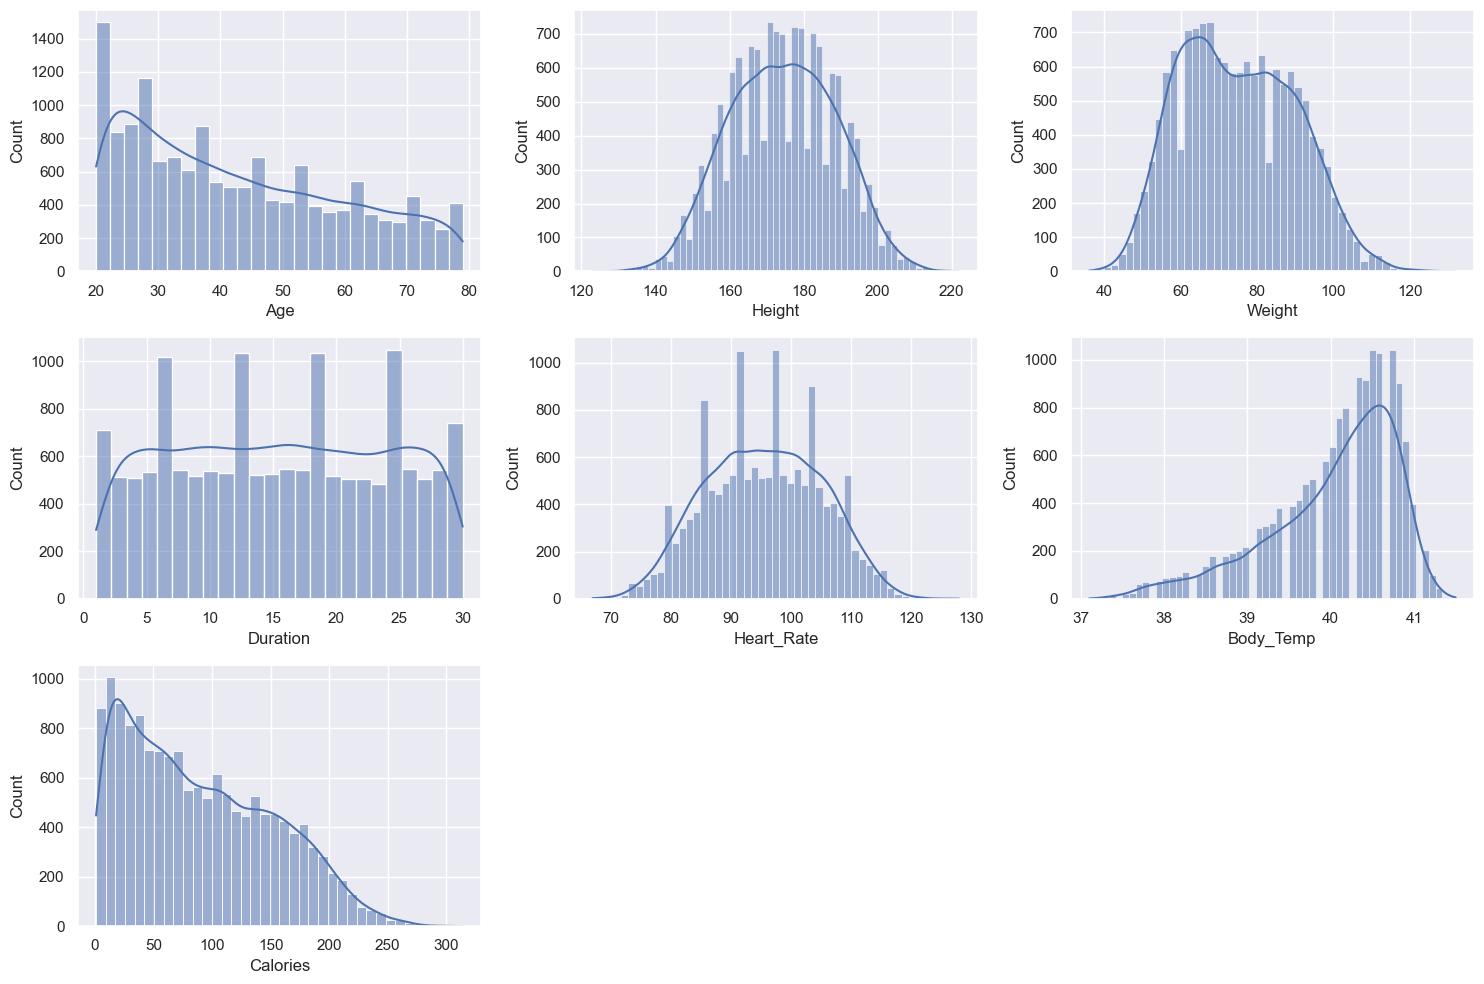

In [79]:
plt.figure(figsize=(15, 10))

plot_position = 1
for i in numerical_col:
    plt.subplot(3, 3, plot_position)
    sns.histplot(x=Numerical_df[i], kde=True)
    plot_position += 1
plt.tight_layout()
plt.show()

From the above distributions, We can infer that Height and Heart_rate are normally distributed. Weight is sowewhat normally distributed. But Age, Body_temp and calories burnt are skewed distribution. Age and calories burnt are positively skewed whereas body_temp is negatively skewed.

**Correlation between the features of the dataset and Visualizing the correlation**

In [80]:
Numerical_df.corr()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


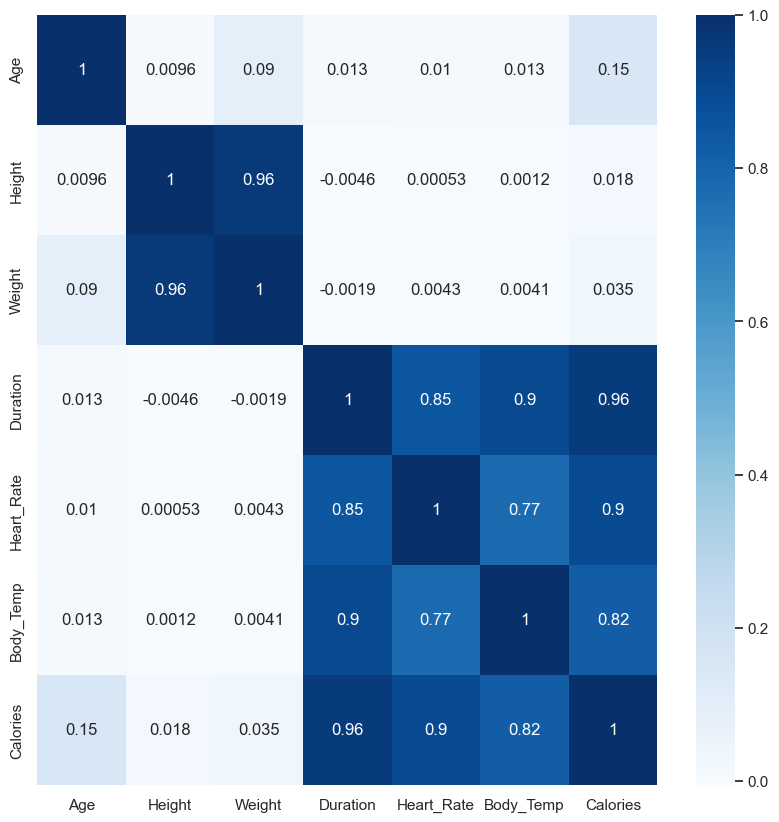

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(Numerical_df.corr(), cmap='Blues', annot=True)
plt.show()

**Representing the correlation among Age, Height, Weight, Duration, Heart rate, Body temperature with Calories**

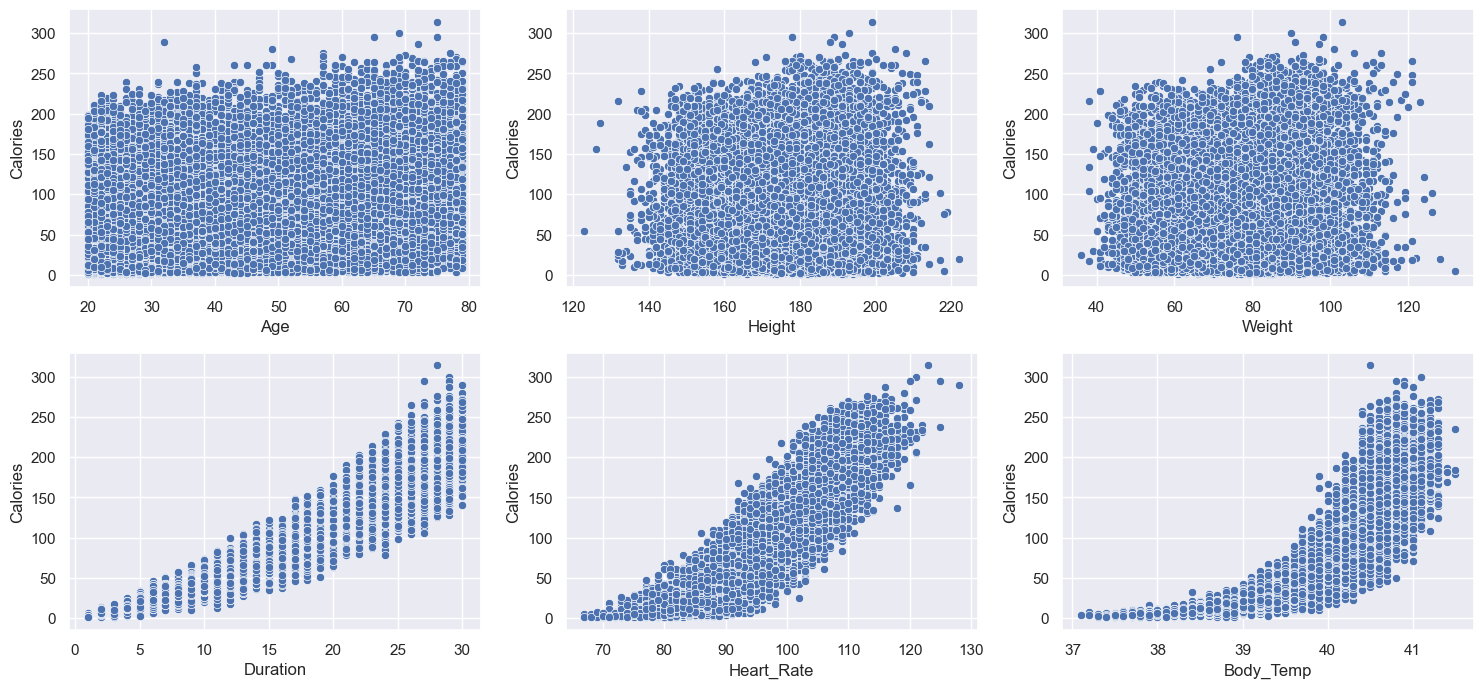

In [82]:
plt.figure(figsize=(15, 10))

plot_position = 1
for i in numerical_col:
    plt.subplot(3, 3, plot_position)
    sns.scatterplot(x=Numerical_df[i],y=Numerical_df['Calories'])
    plot_position += 1
    if plot_position == 7:
        break
plt.tight_layout()
plt.show()

<Axes: >

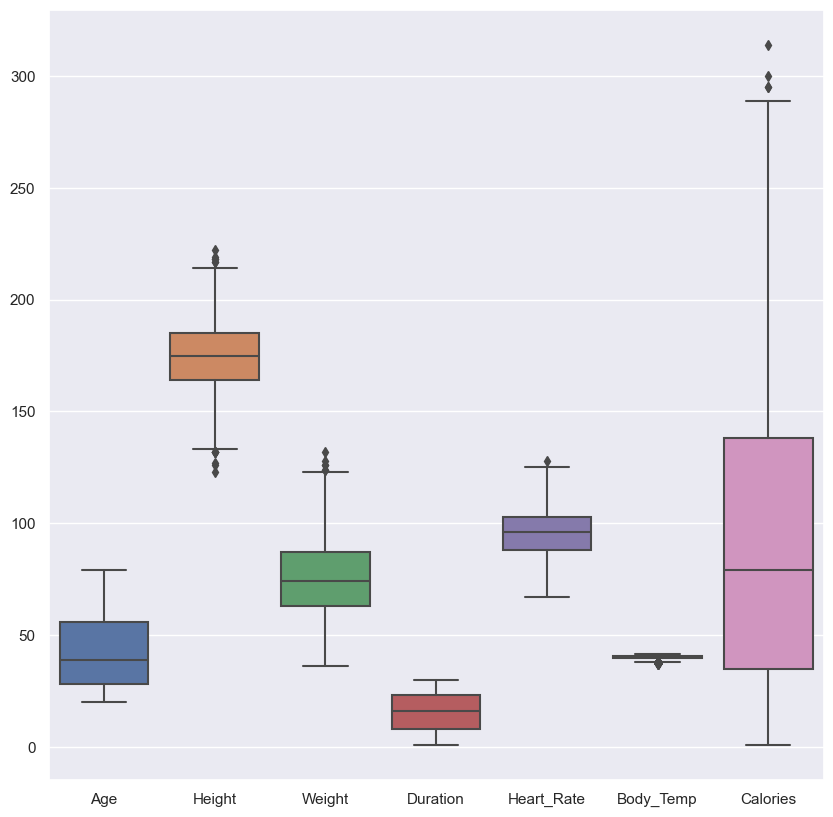

In [83]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)

**Converting the Categorical column Gender("Male" and "Female") into Numerical column(0 and 1)**

In [84]:
int = {'male':0,'female':1}
df['Gender'] = df['Gender'].map(int)

In [85]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


**Seperating Feature and Target Variable as X and Y respectively.**

In [86]:
X = df.drop('Gender',axis=1)
Y = df['Gender']

In [87]:
X

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,69,179.0,79.0,5.0,88.0,38.7,26.0
3,34,179.0,71.0,13.0,100.0,40.5,71.0
4,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...
14995,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,78,193.0,97.0,2.0,84.0,38.3,11.0


In [88]:
Y

0        0
1        1
2        0
3        1
4        1
        ..
14995    1
14996    1
14997    1
14998    0
14999    0
Name: Gender, Length: 15000, dtype: int64

Splitting the data for Training and Testing

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of Y_train:",Y_train.shape)
print("Shape of Y_test:",Y_test.shape)

Shape of X_train: (12000, 7)
Shape of X_test: (3000, 7)
Shape of Y_train: (12000,)
Shape of Y_test: (3000,)


### LINEAR REGRESSION

In [90]:
lr = LinearRegression()

In [91]:
lr.fit(X_train,Y_train)

LinearRegression()

In [92]:
y_predictions = lr.predict(X_test)
print(y_predictions)

[ 0.48120461 -0.01958056  0.80770942 ...  0.81953955  0.85496323
  0.79410408]


In [93]:
print("Model score:",lr.score(X_train,Y_train))

r2_score = metrics.r2_score(Y_test,y_predictions)
print("R2_Score:",r2_score)

print("Mean Absolute Error (MAE):",metrics.mean_absolute_error(Y_test,y_predictions))

print("Mean Squared Error (MSE):",metrics.mean_squared_error(Y_test,y_predictions))

print("Root Mean Square Error (RMSE):",np.sqrt(metrics.mean_squared_error(Y_test,y_predictions)))

Model score: 0.6431412012801707
R2_Score: 0.6554686000711517
Mean Absolute Error (MAE): 0.23693226459373606
Mean Squared Error (MSE): 0.08613223748194553
Root Mean Square Error (RMSE): 0.2934829424037205


In [94]:
print("The coefficients of the regression equation are:",lr.coef_)
print('\n')
print("The Intercept of the regression equation are:",lr.intercept_)

The coefficients of the regression equation are: [ 0.00280311  0.02085455 -0.04537979 -0.00685029 -0.00245877  0.02211186
  0.00099405]


The Intercept of the regression equation are: -0.4856424975810043


### Outlier Removal using InterQuartile Range Method

HEIGHT COLUMN

In [95]:
# FOR HEIGHT COLUMN
percentile25 = df['Height'].quantile(0.25)
percentile75 = df['Height'].quantile(0.75)
print("25 Percentile:",percentile25)
print("75 percentile",percentile75)

# IQR
iqr = percentile75 - percentile25
print("Inter Quartile Range:",iqr)

# SETTING UPPER AND LOWER LIMITS FOR THE DATASET
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit:",upper_limit)
print("Lower limit:",lower_limit)

25 Percentile: 164.0
75 percentile 185.0
Inter Quartile Range: 21.0
Upper limit: 216.5
Lower limit: 132.5


In [96]:
df_new = df[(df['Height']<upper_limit) & (df['Height']>lower_limit)]
df_new

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,0,78,193.0,97.0,2.0,84.0,38.3,11.0


WEIGHT COLUMN

In [97]:
percentile25 = df_new['Weight'].quantile(0.25)
percentile75 = df_new['Weight'].quantile(0.75)
print("25 Percentile:",percentile25)
print("75 percentile",percentile75)
# IQR
iqr = percentile75 - percentile25
print("Inter Quartile Range:",iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit:",upper_limit)
print("Lower limit:",lower_limit)

25 Percentile: 63.0
75 percentile 87.0
Inter Quartile Range: 24.0
Upper limit: 123.0
Lower limit: 27.0


In [98]:
df_new = df_new[(df_new['Weight']<upper_limit) & (df_new['Weight']>lower_limit)]
df_new

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,0,78,193.0,97.0,2.0,84.0,38.3,11.0


HEART_RATE COLUMN

In [99]:
percentile25 = df_new['Heart_Rate'].quantile(0.25)
percentile75 = df_new['Heart_Rate'].quantile(0.75)
print("25 Percentile:",percentile25)
print("75 percentile",percentile75)
# IQR
iqr = percentile75 - percentile25
print("Inter Quartile Range:",iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit:",upper_limit)
print("Lower limit:",lower_limit)

25 Percentile: 88.0
75 percentile 103.0
Inter Quartile Range: 15.0
Upper limit: 125.5
Lower limit: 65.5


In [100]:
df_new = df_new[(df_new['Heart_Rate']<upper_limit) & (df_new['Heart_Rate']>lower_limit)]
df_new

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,0,78,193.0,97.0,2.0,84.0,38.3,11.0


In [101]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14982 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      14982 non-null  int64  
 1   Age         14982 non-null  int64  
 2   Height      14982 non-null  float64
 3   Weight      14982 non-null  float64
 4   Duration    14982 non-null  float64
 5   Heart_Rate  14982 non-null  float64
 6   Body_Temp   14982 non-null  float64
 7   Calories    14982 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.0 MB


<Axes: >

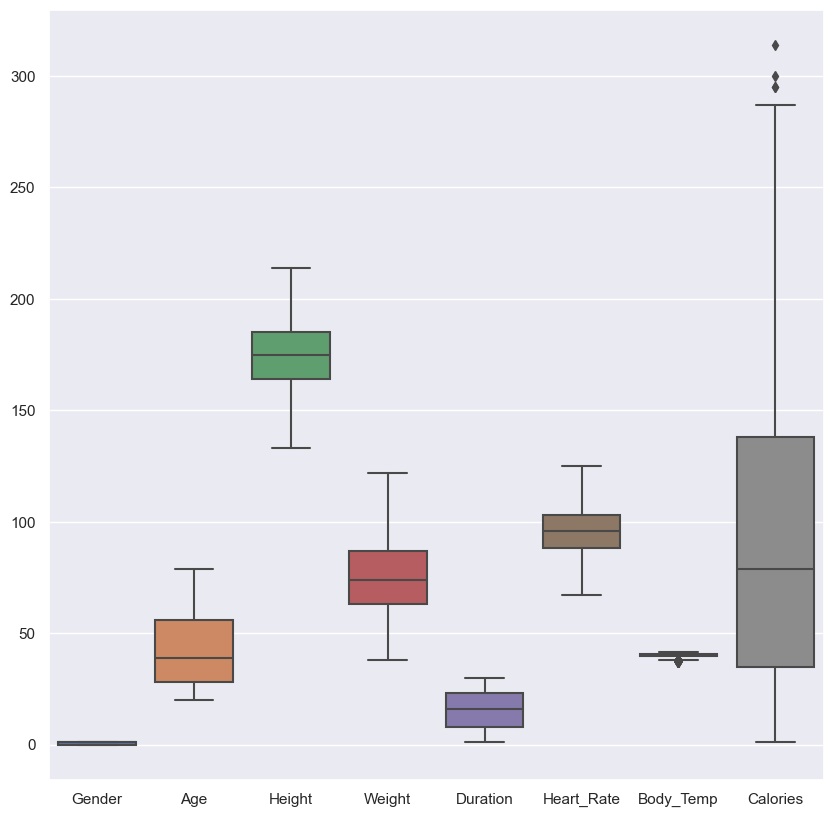

In [102]:
plt.figure(figsize=(10,10))
sns.boxplot(df_new)

All the outliers from Height, Weight and Heart_Rate columns are removed. We can conclude from the above box plot that all the outliers are successfully removed using Inter-Quartile range method. Now we apply the Linear Regression on this new dataset containing no outliers. Total outliers found and removed are 18. Let us see the observation

### LINEAR REGRESSION ON NEW DATAFRAME WITHOUT OUTLIERS 

In [103]:
X = df_new[['Gender','Age','Height','Weight','Duration','Heart_Rate','Body_Temp']]
Y = df_new['Calories']

In [104]:
lr = LinearRegression()

In [105]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [106]:
lr.fit(X_train,Y_train)

LinearRegression()

In [107]:
y_predictions = lr.predict(X_test)
y_predictions

array([ 28.40115763,  15.85214758,  17.38741614, ..., 159.52252715,
        28.10105978,  81.39745642])

In [108]:
print("Model score:",lr.score(X_train,Y_train))

r2_score = metrics.r2_score(Y_test,y_predictions)
print("R2_Score:",r2_score)

Model score: 0.9673434182515641
R2_Score: 0.9667977777756451


### XGBOOST

In [109]:
X = df.drop('Gender',axis=1)
Y = df['Gender']

In [110]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [111]:
xg = XGBRegressor()

In [112]:
xg.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [113]:
y_predictions = xg.predict(X_test)
print(y_predictions)

[4.8977369e-01 5.7775853e-04 1.0543568e+00 ... 9.7548544e-01 1.0061418e+00
 9.5122147e-01]


In [114]:
print("Model score:",xg.score(X_train,Y_train))

r2_score = metrics.r2_score(Y_test,y_predictions)
print("R2_Score:",r2_score)

print("Mean Absolute Error (MAE):",metrics.mean_absolute_error(Y_test,y_predictions))

print("Mean Squared Error (MSE):",metrics.mean_squared_error(Y_test,y_predictions))

print("Root Mean Square Error (RMSE):",np.sqrt(metrics.mean_squared_error(Y_test,y_predictions)))

Model score: 0.9290326612988072
R2_Score: 0.8070533146596222
Mean Absolute Error (MAE): 0.11685554944949642
Mean Squared Error (MSE): 0.04823632831876495
Root Mean Square Error (RMSE): 0.21962770389630937


### XGBOOST ON THE DATASET WITH NO OUTLIERS

In [115]:
X = df_new[['Gender','Age','Height','Weight','Duration','Heart_Rate','Body_Temp']]
Y = df_new['Calories']

In [116]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [117]:
xg = XGBRegressor()

In [118]:
xg.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [119]:
y_predictions = xg.predict(X_test)
print(y_predictions)

[  9.700951  17.873388  24.249556 ... 154.98105   27.00867   62.02514 ]


In [120]:
print("Model score:",xg.score(X_train,Y_train))

r2_score = metrics.r2_score(Y_test,y_predictions)
print("R2_Score:",r2_score)

print("Mean Absolute Error (MAE):",metrics.mean_absolute_error(Y_test,y_predictions))

print("Mean Squared Error (MSE):",metrics.mean_squared_error(Y_test,y_predictions))

print("Root Mean Square Error (RMSE):",np.sqrt(metrics.mean_squared_error(Y_test,y_predictions)))

Model score: 0.9996053529299828
R2_Score: 0.9989481217568736
Mean Absolute Error (MAE): 1.4137828314268552
Mean Squared Error (MSE): 4.132690578683181
Root Mean Square Error (RMSE): 2.032902009119766


## CONCLUSION

In conclusion, the predictive performance of both linear regression and XGBoost models on the task of estimating calories burnt based on factors like gender, age, height, weight, duration, heart rate, and body temperature shows promising results.

**While the linear regression model achieved a respectable score with an R2 of 0.655 and demonstrated moderate errors, the XGBoost model significantly outperformed it with a substantially higher R2 of 0.807 and lower errors across the board. This indicates that the XGBoost algorithm was better able to capture the nonlinear relationships within the data and make more accurate predictions. However in case of Linear Regression applied on the dataset containing no outliers, it is giving tremendous increase in the model score as 0.967 and R2 as 0.966. Similarly when we applied the XGBoost method on the new dataset containing no outliers, we get a very good model score of 0.9996 and R2 of 0.9989**

Therefore, for practical applications where precision is crucial, such as in health and fitness monitoring, the XGBoost model should be preferred due to its superior performance.